In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv
Saving neighbourhoods.geojson to neighbourhoods.geojson


In [ ]:
listings=pd.read_csv('listings.csv')

In [ ]:
listings.drop(['neighbourhood_group'],axis=1,inplace=True)

In [ ]:
#top areas with the highest number of listings
listings['neighbourhood'].value_counts().head(10)

78704    1822
78702    1263
78701     713
78741     622
78703     530
78745     513
78705     505
78751     478
78723     313
78758     298
Name: neighbourhood, dtype: int64

In [ ]:
listings.room_type.value_counts()

Entire home/apt    7962
Private room       2166
Shared room         133
Hotel room           11
Name: room_type, dtype: int64

In [ ]:
ent=listings.loc[listings['room_type']=='Entire home/apt']

In [ ]:
pri=listings.loc[listings['room_type']=='Private room']

In [ ]:
ent=pd.DataFrame(ent['neighbourhood'].value_counts())
pri=pd.DataFrame(pri['neighbourhood'].value_counts())

In [ ]:
ent.columns = ['ent']
pri.columns=['pri']

In [ ]:
ent['neighbourhood']=ent.index
pri['neighbourhood']=pri.index

In [ ]:
ent.reset_index(drop=True, inplace=True)
pri.reset_index(drop=True, inplace=True)

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 5.2MB/s 
     |████████████████████████████████| 6.5MB 12.4MB/s 
     |████████████████████████████████| 15.3MB 277kB/s 


In [ ]:
import geopandas as gpd

In [ ]:
X=gpd.read_file('neighbourhoods.geojson')

In [ ]:
X.neighbourhood=X.neighbourhood.astype(int)

In [ ]:
df_merged = pd.merge(X, ent, on='neighbourhood')

In [ ]:
df_merged= pd.merge(df_merged, pri, on='neighbourhood')

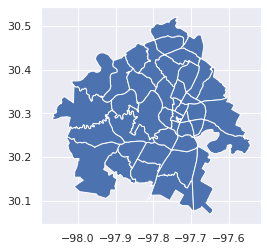

In [ ]:
df_merged.plot()

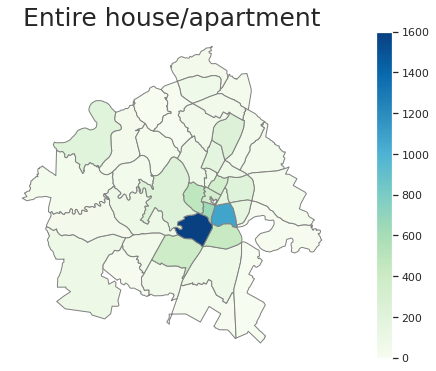

In [ ]:
# set to min and max of data
vmin, vmax = 0, 1600
 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))
 
# add a title and annotation
ax.set_title('Entire house/apartment', fontdict={'fontsize': '25', 'fontweight' : '3'})
 
# create map
df_merged.plot(column='ent', cmap='GnBu', linewidth=1, ax=ax, edgecolor='.5')
 
# remove the axis
ax.axis('off')
 
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
 
# empty array for the data range
sm.set_array([])
 
#add colorbar
cbar = fig.colorbar(sm)

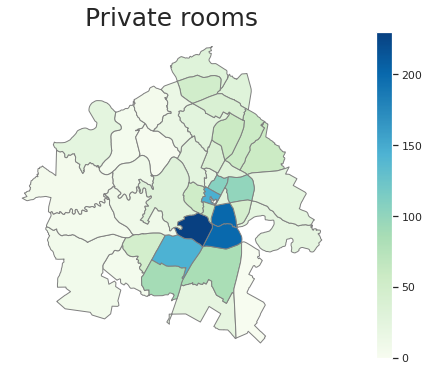

In [ ]:
# set to min and max of data
vmin, vmax = 0, 230
 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))
 
# add a title and annotation
ax.set_title('Private rooms', fontdict={'fontsize': '25', 'fontweight' : '3'})
 
# create map
df_merged.plot(column='pri', cmap='GnBu', linewidth=1, ax=ax, edgecolor='.5')
 
# remove the axis
ax.axis('off')
 
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
 
# empty array for the data range
sm.set_array([])
 
#add colorbar
cbar = fig.colorbar(sm)

In [ ]:
#top 10 hosts by their total number of listings
listings['host_name'].value_counts().head(10)

Kia                         398
WanderJaunt                 131
TurnKey Vacation Rentals    124
Martin                      101
Michael                      98
David                        76
Sarah                        74
Ryan                         67
James                        62
Renters Club                 56
Name: host_name, dtype: int64

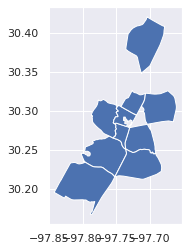

In [ ]:
#top areas with highest number of listings
top10=pd.DataFrame(listings['neighbourhood'].value_counts())
top10.columns=['#listings']
top10['neighbourhood']=top10.index
top10.reset_index(drop=True, inplace=True)
 
top10= pd.merge(df_merged, top10, on='neighbourhood')
top10=top10.sort_values(by=['#listings'],ascending=False).head(10)
top10.plot()